In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import norm

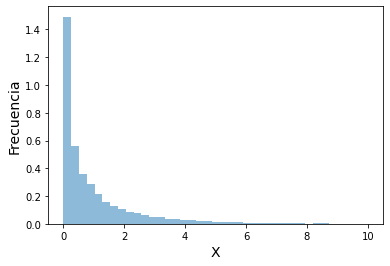

In [31]:
# Genero numeros que siguen distribucion gaussiana normal y los elevo al cuadrado
x = norm.rvs(loc = 0, scale = 1, size = 20000) # Genero 20.000 variables x en lugar de 20 para mayor estadística
y = np.power(x,2)

# Genero el histograma
bin = np.linspace(0,10,40)
hist, bins = np.histogram(y, bins = bin)

# Grafico
plt.hist(y, bins, density = True, alpha=0.5, label = 'Z')
plt.xlabel('X', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.show()

El histograma obtenido a partir de la variable Y indica que ésta sigue una distribución chi-cuadrado.

In [12]:
# Calculo Z como la suma de 20 variables Y, repito el procedimiento 10.000 veces.
Z = []

for i in range(10000):
    x = norm.rvs(loc = 0, scale = 1, size = 20)
    y = np.power(x,2)
    Z.append(np.sum(y))

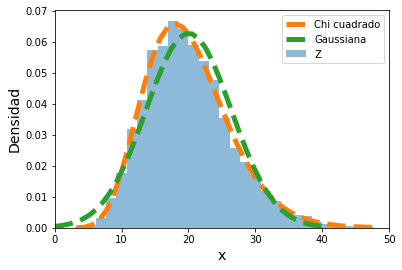

In [26]:
# Genero el histograma de la variable Z
bin = np.linspace(0,60,40)
hist, bins = np.histogram(Z, bins = bin)

# Simulo una distribución chi-cuadrado con 20 grados de libertad
df = 20
x = np.linspace(chi2.ppf(0.01, df)-5, chi2.ppf(0.99, df)+10, 40)

# Simulo una distribución gaussiana a partir de la media y la desviación estandar de la variable Z
loc = np.mean(Z)
scale = np.std(Z)
x_gauss = np.linspace(0, 40, 40)
gauss = norm.pdf(x_gauss, loc, scale)

# Grafico
plt.hist(Z, bins, density = True, alpha=0.5, label = 'Z')
plt.plot(x, chi2.pdf(x, df), '--', lw = 5, label='Chi cuadrado')
plt.plot(x_gauss, gauss, '--', lw=5, label = 'Gaussiana')
plt.xlim(0, 50)
plt.xlabel('x', fontsize = 14)
plt.ylabel('Densidad', fontsize = 14)
plt.legend(loc = 'best')
plt.show()

Se observa que la distribución chi-cuadrado con 20 grados de libertad concuerda en gran medida con el histograma de la variable Z. En cambio, la distribución gaussiana difiere de Z. El teorema central del límite establece que a valores de k suficientemente grandes la distribución chi-cuadrado puede aproximarse a una distribución normal. Según las conclusiones extraidas previamente, k = 20 no es lo suficientemente grande como para que la mencionada aproximación pueda aplicarse. 